In [ ]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import cv2

from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# setting variables
img_ht = 224
img_wd = 224

labels = ['PNEUMONIA', 'NORMAL']


In [24]:
# preprocess images to make them the same size in pixels
def resize_img( img, size=(img_ht, img_wd)):
    return cv2.resize(img, size)



def process_images_in_directory(directory, output_directory, process_func):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if not os.path.isdir(category_path):  # Skip files that are not directories
            continue

        output_category_path = os.path.join(output_directory, category)
        if not os.path.exists(output_category_path):
            os.makedirs(output_category_path)

        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is not None:
                processed_img = process_func(img)
                output_img_path = os.path.join(output_category_path, filename)
                cv2.imwrite(output_img_path, (processed_img).astype(np.uint8))



In [25]:
train_dir = "/content/drive/MyDrive/chest_xray/train"
val_dir = "/content/drive/MyDrive/chest_xray/val"
test_dir = "/content/drive/MyDrive/chest_xray/test"
output_base_dir = '/content/drive/MyDrive/chest_xray/processed'

In [26]:
process_images_in_directory(val_dir, os.path.join(output_base_dir, 'val'), resize_img)
process_images_in_directory(test_dir, os.path.join(output_base_dir, 'test'), resize_img)
process_images_in_directory(train_dir, os.path.join(output_base_dir, 'train'), resize_img)

In [27]:
def get_data(data_dir):
    data = []

    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                data.append([img_arr, class_num])
            except Exception as e:
                pass

    return np.array(data, dtype=object)

In [28]:
val = get_data('/content/drive/MyDrive/chest_xray/processed/val')

test = get_data('/content/drive/MyDrive/chest_xray/processed/test')

# save the big one for last
train = get_data("/content/drive/MyDrive/chest_xray/processed/train")

In [29]:
print(train.shape)
print(test.shape)
print(val.shape)


(5265, 2)
(624, 2)
(16, 2)


In [36]:
train[0][0].shape

(224, 224, 3)

In [18]:
# Load the MobileNetV2 model
# https://keras.io/api/applications/mobilenet/
# weights = imagenet by default


model = MobileNetV2(classifier_activation='softmax')





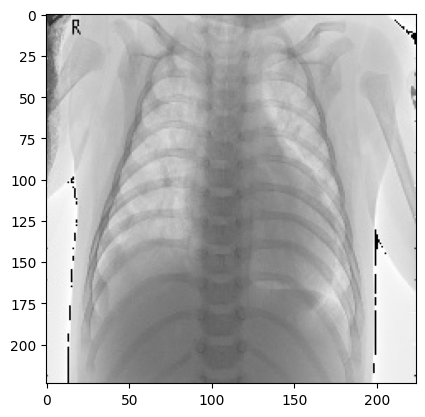

In [37]:
img = train[0][0]
plt.imshow(img)

In [40]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02895154', 'breastplate', 0.13037798), ('n01990800', 'isopod', 0.08627137), ('n03146219', 'cuirass', 0.08610558)]


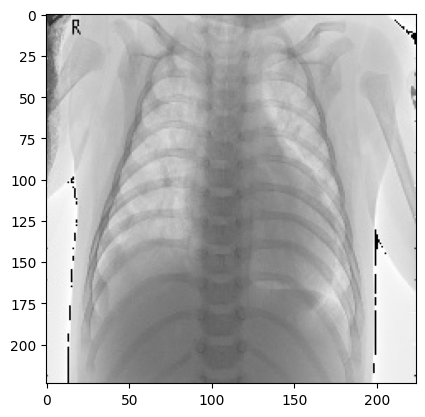

In [41]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

